Importando módulos

In [1]:
import FaceFilters as FF
import cv2
import dlib
import time
import numpy as np
from math import asin, pi

Carregando classificador de faces e landmarks

In [2]:
face_cascade = cv2.CascadeClassifier('../data/lbpcascade_frontalface.xml')
predictor = dlib.shape_predictor('../data/shape_predictor_68_face_landmarks.dat')

Leitura da imagem e transformando para tons de cinza

In [3]:
ori_img = cv2.imread('../images/suits.jpeg')
gray = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
debug_img = np.copy(ori_img)
filter_img = np.copy(ori_img)

Detecção das faces

In [4]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

Para cada face identifica os pontos dos olhos, nariz e boca. E coloca os filtros

In [5]:
for (x, y, w, h) in faces:
    dlib_rect = dlib.rectangle(int(x), int(y), int(x + w), int(y + h))
    landmarks = np.matrix([[p.x, p.y] for p in predictor(ori_img, dlib_rect).parts()])
    FF.put_debug(debug_img, landmarks, x, y, w, h)
    FF.Glasses.put(filter_img, landmarks, w, h, x, y)
    FF.Mustache.put(filter_img, landmarks, w, h, x, y)

Imagem Original

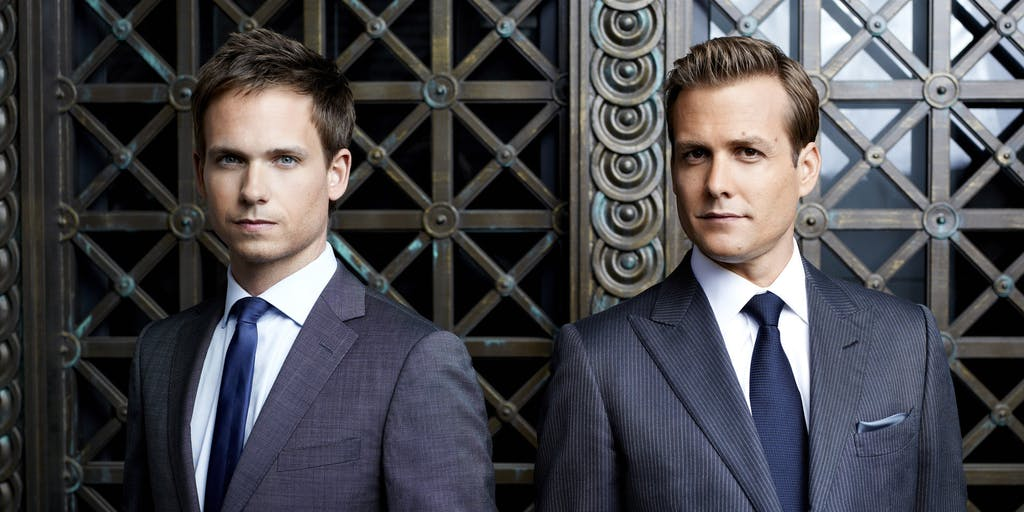

In [6]:
from IPython.display import Image
Image(filename='../images/suits.jpeg') 

Imagem com filtro de debug

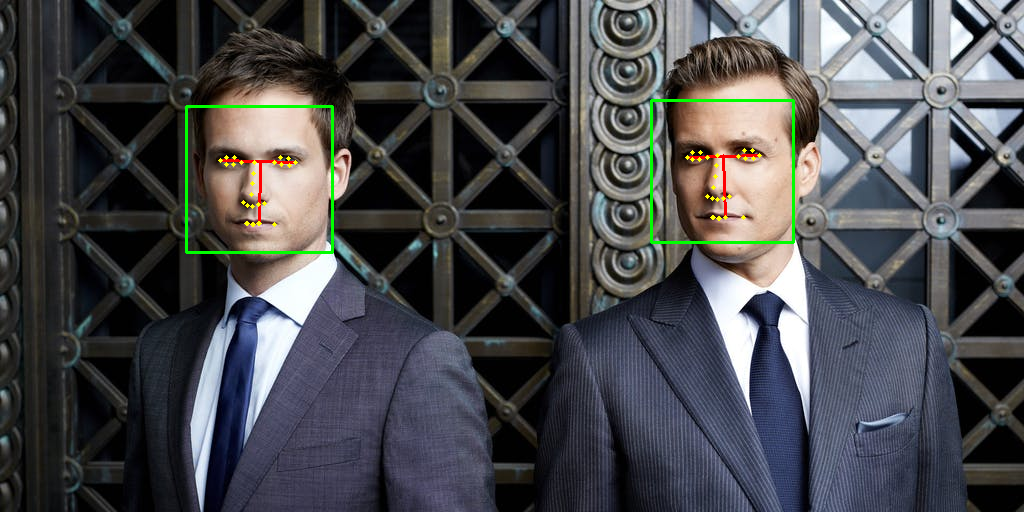

In [7]:
Image(filename='../output/suits_debug.png') 

Imagem com filtro Glasses e Mustache

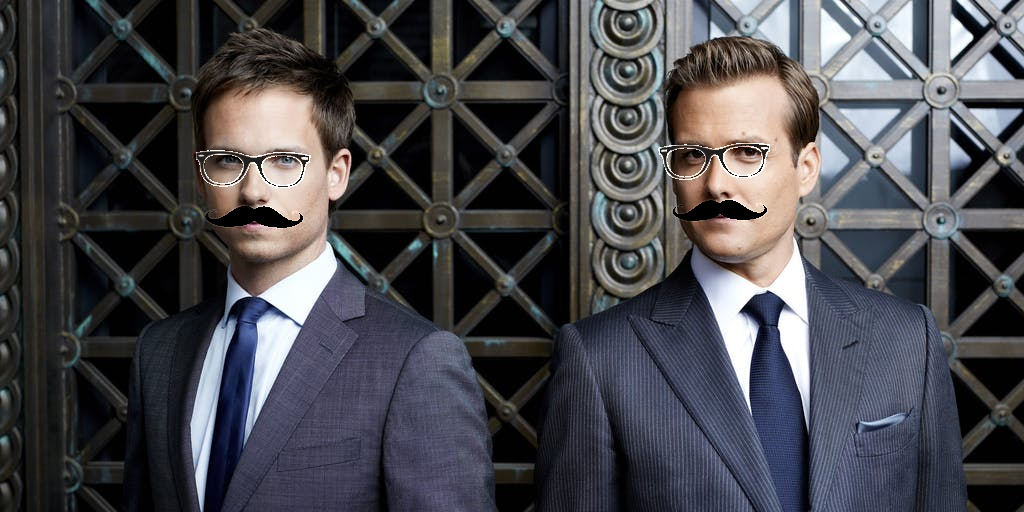

In [8]:
Image(filename='../output/suits_filter.png') 